### Import libraries

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in the two dataframes

In [171]:
df1 = pd.read_csv('/content/UK-constituency-data.csv')
big_df = pd.read_excel('/content/BES-2019-General-Election-results-file-v1.1.xlsx')

pd.set_option("display.max_columns", None)

In [172]:
big_df.head()

,pano,ONSConstID,ConstituencyName,Country,Region,ConstituencyType,Winner19,Con19,Lab19,LD19,SNP19,PC19,UKIP19,Green19,Brexit19,Other19,Majority19,Turnout19,ConVote19,LabVote19,LDVote19,SNPVote19,PCVote19,UKIPVote19,GreenVote19,BrexitVote19,TotalVote19,RejectedVote19,Electorate19,SeatChange1719,Con1719,Lab1719,LD1719,SNP1719,PC1719,UKIP1719,Green1719,Winner17,Con17,Lab17,LD17,SNP17,PC17,UKIP17,Green17,Other17,Majority17,Turnout17,ConVote17,LabVote17,LDVote17,SNPVote17,PCVote17,UKIPVote17,GreenVote17,TotalVote17,RejectedVote17,Electorate17,SeatChange1517,Con1517,Lab1517,LD1517,SNP1517,PC1517,UKIP1517,Green1517,Winner15,Con15,Lab15,LD15,SNP15,PC15,UKIP15,Green15,Other15,Majority15,Turnout15,ConVote15,LabVote15,LDVote15,SNPVote15,PCVote15,UKIPVote15,GreenVote15,BNPVote15,TotalVote15,RejectedVote15,Electorate15,SeatChange1015,Con1015,Lab1015,LD1015,SNP1015,PC1015,UKIP1015,Green1015,Winner10,Con10,Lab10,LD10,SNP10,PC10,UKIP10,Green10,BNP10,Majority10,Turnout10,ConVote10,LabVote10,LDVote10,SNPVote10,PCVote10,UKIPVote10,GreenVote10,BNPVote10,TotalVote10,Electorate10,Con0510,Lab0510,LD0510,SNP0510,PC0510,BNP0510,UKIP0510,Green0510,Winner05,Con05,Lab05,LD05,SNP05,PC05,UKIP05,Green05,BNP05,Other05,Majority05,Turnout05,ConVote05,LabVote05,LDVote05,SNPVote05,PCVote05,UKIPVote05,GreenVote05,BNPVote05,TotalVote05,Electorate05,leaveHanretty,remainHanretty,ConPPC19,ConPPCsex19,LabPPC19,LabPPCsex19,LDPPC19,LDPPCsex19,SNPPPC19,SNPPPCsex19,PCPPC19,PCPPCsex19,UKIPPPC19,UKIPPPCsex19,GreenPPC19,GreenPPCsex19,BrexitPPC19,BrexitPPCsex19,ConPPC17,ConPPCsex17,LabPPC17,LabPPCsex17,LDPPC17,LDPPCsex17,SNPPPC17,SNPPPCsex17,PCPPC17,PCPPCsex17,UKIPPPC17,UKIPPPCsex17,GreenPPC17,GreenPPCsex17,ConPPC15,ConPPCsex15,ConPPCrace15,LabPPC15,LabPPCsex15,LabPPCrace15,LDPPC15,LDPPCsex15,LDPPCrace15,SNPPPC15,SNPPPCsex15,SNPPPCrace15,PCPPC15,PCPPCsex15,PCPPCrace15,UKIPPPC15,UKIPPPCsex15,UKIPPPCrace15,GreenPPC15,GreenPPCsex15,GreenPPCrace15,c11Population,c11PopulationDensity,c11Male,c11Female,c11Households,c11Communal,c11Age0to4,c11Age5to7,c11Age8to9,c11Age10to14,c11Age15,c11Age16to17,c11Age18to19,c11Age20to24,c11Age25to29,c11Age30to44,c11Age45to59,c11Age60to64,c11Age65to74,c11Age75to84,c11Age85to89,c11Age90plus,c11HouseOwned,c11HouseOutright,c11HouseMortgage,c11HouseShared,c11HouseSocial,c11HouseSocialLA,c11HouseSocialOther,c11HousePrivate,c11HousePrivateLandlord,c11HousePrivateOther,c11HouseRentFree,c11HouseholdOnePerson,c11HouseholdOnePerson65plus,c11HouseholdOnePersonOther,c11HouseholdOneFamily,c11HouseholdOneFamily65plus,c11HouseholdMarried,c11HouseholdMarriedNoChildren,c11HouseholdMarriedDependents,c11HouseholdMarriedNondependents,c11HouseholdCohabit,c11HouseholdCohabitNoChildren,c11HouseholdCohabitDependents,c11HouseholdCohabitNodependents,c11HouseholdLone,c11HouseholdLoneDependents,c11HouseholdLoneNodependents,c11HouseholdOther,c11HouseholdOtherDependents,c11HouseholdAllStudents,c11HouseholdAll65plus,c11HouseholdAnyOther,c11CarsNone,c11CarsOne,c11CarsTwo,c11CarsThree,c11CarsFour,c11EthnicityWhite,c11EthnicityMixed,c11EthnicityAsian,c11EthnicityBlack,c11EthnicityOther,c11EthnicityWhiteBritish,c11EthnicityWhiteIrish,c11EthnicityWhiteTraveller,c11EthnicityWhiteOther,c11EthnicityMixedCaribbean,c11EthnicityMixedAfrican,c11EthnicityMixedAsian,c11EthnicityMixedOther,c11EthnicityIndian,c11EthnicityPakistani,c11EthnicityBangladeshi,c11EthnicityChinese,c11EthnicityOtherAsian,c11EthnicityBlackAfrican,c11EthnicityBlackCaribbean,c11EthnicityBlackOther,c11EthnicityArab,c11EthnicityAnyOther,c11BornUK,c11BornEngland,c11BornNI,c11BornScotland,c11BornWales,c11BornUKNotSpecified,c11BornIreland,c11BornOtherEU,c11BornOtherPre2004EU,c11BornPost2004EU,c11BornOther,c11PassportNone,c11PassportAny,c11PassportUK,c11PassportIreland,c11PassportEU,c11PassportEuropeNotEU,c11PassportAfrica,c11PassportAsia,c11PassportNorthAmerica,c11PassportCentralAmerica,c11PassportSouthAmerica,c11PassportOceania,c11EnglishAll,c11EnglishOne,c11EnglishChild,c11EnglishNone,c11Christian,c11Buddhist,c11Hindu,c11Jewis

In [173]:
## big_df has hundreds of features
## List of all the features I want to use:

cols = ['ONSConstID', 'ConstituencyName', 'Country', 'Region', 
        'Winner10',  'Con10',	'Lab10',	'LD10',	'SNP10',	'PC10',	'UKIP10','Green10','BNP10',
        'c11Population', 'c11PopulationDensity',
        'c11Male', 
        'c11Age0to4', 'c11Age5to7', 'c11Age8to9', 'c11Age10to14', 'c11Age15', 'c11Age16to17', 'c11Age18to19', 'c11Age20to24',
        'c11Age25to29', 'c11Age30to44', 'c11Age45to59', 'c11Age60to64', 'c11Age65to74', 'c11Age75to84', 'c11Age85to89', 'c11Age90plus',
        'c11HouseOwned',
        'c11EthnicityWhite',
        'c11Christian', 'c11Buddhist', 'c11Hindu', 'c11Jewish', 'c11Muslim', 'c11Sikh', 'c11ReligionOther']

In [174]:
df2 = big_df[cols]

In [175]:
## Group some of the age catergories together
columns1= ['c11Age0to4', 'c11Age5to7', 'c11Age8to9', 'c11Age10to14', 'c11Age15', 'c11Age16to17']
columns2 = ['c11Age18to19', 'c11Age20to24']
columns3 = ['c11Age25to29', 'c11Age30to44']
columns4 = ['c11Age45to59', 'c11Age60to64']
columns5 = ['c11Age65to74', 'c11Age75to84']
columns6 = ['c11Age85to89', 'c11Age90plus']


df2['0-17']= df2[columns1].sum(axis=1)
df2['18-24']= df2[columns2].sum(axis=1)
df2['25-44']= df2[columns3].sum(axis=1)
df2['45-64']= df2[columns4].sum(axis=1)
df2['65-84']= df2[columns5].sum(axis=1)
df2['85+']= df2[columns6].sum(axis=1)

<ipython-input-175-9bdc9fdfd108>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['0-17']= df2[columns1].sum(axis=1)
<ipython-input-175-9bdc9fdfd108>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['18-24']= df2[columns2].sum(axis=1)
<ipython-input-175-9bdc9fdfd108>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [176]:
 ## Drop the original age columns
 df2.drop(columns = ['c11Age0to4', 'c11Age5to7', 'c11Age8to9', 'c11Age10to14', 'c11Age15', 'c11Age16to17', 'c11Age18to19', 'c11Age20to24',
 'c11Age25to29', 'c11Age30to44', 'c11Age45to59', 'c11Age60to64', 'c11Age65to74', 'c11Age75to84', 'c11Age85to89', 'c11Age90plus'], inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [177]:
df1.rename(columns={"PCON14CD": "ONSConstID"},inplace = True)

In [178]:
df1

,ONSConstID,PCON14NM,house,salary,publicsector,degree,age,nonukborn,health
0,W07000052,Rhondda,62000,432.4,38.9,14.0,33,2.1,70.6
1,E14000642,Clacton,150000,426.4,26.1,13.4,39,4.3,70.9
2,E14000677,Easington,80000,438.7,20.2,15.3,41,2.2,71.8
3,W07000071,Merthyr Tydfil and Rhymn,82000,434.0,35.1,16.4,46,3.9,72.1
4,N06000004,Belfast West,x,390.7,x,15.0,41,3.9,72.5
...,...,...,...,...,...,...,...,...,...
645,E14000844,North East Hampshire,315000,672.9,9.8,38.9,42,9.0,88.2
646,S14000037,Gordon,x,615.8,9.9,28.2,34,5.5,88.2
647,E14000549,Battersea,515000,704.7,11.7,57.4,38,34.5,88.3
648,E14000896,Richmond Park,545000,834.3,17.8,55.2,34,29.9,88.4


### Merge the data frames on the ONS Constituency ID

In [179]:
dfmerge = pd.merge(df1, df2, on=['ONSConstID'], how = 'left')

In [180]:
dfmerge

,ONSConstID,PCON14NM,house,salary,publicsector,degree,age,nonukborn,health,ConstituencyName,Country,Region,Winner10,Con10,Lab10,LD10,SNP10,PC10,UKIP10,Green10,BNP10,c11Population,c11PopulationDensity,c11Male,c11HouseOwned,c11EthnicityWhite,c11Christian,c11Buddhist,c11Hindu,c11Jewish,c11Muslim,c11Sikh,c11ReligionOther,0-17,18-24,25-44,45-64,65-84,85+
0,W07000052,Rhondda,62000,432.4,38.9,14.0,33,2.1,70.6,Rhondda,Wales,Wales,Labour,6.41,55.30,10.65,NaN,18.12,1.15,NaN,NaN,69576.0,6.965325,48.993906,70.214025,98.072611,45.307290,0.137979,0.066115,0.028746,0.379441,0.058928,0.461366,21.030240,9.095090,24.666552,26.460274,16.188053,2.559791
1,E14000642,Clacton,150000,426.4,26.1,13.4,39,4.3,70.9,Clacton,England,East of England,Conservative,53.03,25.04,12.93,NaN,NaN,NaN,1.24,4.58,85359.0,6.455577,47.211190,73.450720,97.442566,64.564955,0.202673,0.154641,0.158156,0.323340,0.025773,0.411204,17.939526,6.924870,17.939526,26.988367,25.471245,4.736466
2,E14000677,Easington,80000,438.7,20.2,15.3,41,2.2,71.8,Easington,England,North East,Labour,13.72,58.94,16.03,NaN,NaN,4.67,NaN,6.64,82769.0,7.035865,48.896326,63.826130,98.696372,74.507364,0.107528,0.055576,0.028996,0.275465,0.196934,0.200558,20.626080,9.110899,25.225628,27.356861,15.801810,1.878723
3,W07000071,Merthyr Tydfil and Rhymn,82000,434.0,35.1,16.4,46,3.9,72.1,Merthyr Tydfil and Rhymney,Wales,Wales,Labour,7.52,43.67,31.02,NaN,5.05,2.72,NaN,3.66,75220.0,4.635036,48.990960,64.415452,97.868918,54.360542,0.200744,0.106355,0.010635,0.295134,0.099708,0.348312,21.568732,9.166445,25.894709,26.628556,14.707525,2.034034
4,N06000004,Belfast West,x,390.7,x,15.0,41,3.9,72.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,E14000844,North East Hampshire,315000,672.9,9.8,38.9,42,9.0,88.2,North East Hampshire,England,South East,Conservative,60.59,9.77,25.46,NaN,NaN,4.18,NaN,NaN,96089.0,2.395039,49.595687,76.872491,95.481273,65.353995,0.427728,0.651479,0.114477,0.518270,0.187326,0.317414,22.696667,6.223397,26.151797,28.336230,14.514669,2.077241
646,S14000037,Gordon,x,615.8,9.9,28.2,34,5.5,88.2,Gordon,Scotland,Scotland,Liberal Democrat,18.68,20.11,36.03,22.20,NaN,NaN,1.54,1.43,99880.0,0.667420,49.481378,77.411770,97.508010,46.776131,0.204245,0.179215,0.023028,0.587705,0.022026,0.245294,20.609732,7.253704,26.871245,29.884862,13.583300,1.797157
647,E14000549,Battersea,515000,704.7,11.7,57.4,38,34.5,88.3,Battersea,England,London,Conservative,47.35,35.10,14.71,NaN,NaN,1.04,1.15,NaN,106709.0,103.770227,48.892783,41.996919,73.483961,55.055337,0.758137,1.107685,0.475124,5.545924,0.185551,0.396405,16.562802,9.022669,49.694028,16.833632,6.967547,0.919323
648,E14000896,Richmond Park,545000,834.3,17.8,55.2,34,29.9,88.4,Richmond Park,England,London,Conservative,49.71,5.03,42.81,NaN,NaN,1.13,0.97,NaN,116846.0,31.458587,48.548517,60.948188,81.645071,54.057477,1.058658,2.228574,0.992760,4.607774,0.540027,0.487822,22.147955,7.312189,33.247180,23.976003,11.153142,2.163531


### Data exploration

In [181]:
df = dfmerge.copy()

In [182]:
## Check the data types
df.dtypes

ONSConstID               object
PCON14NM                 object
house                    object
salary                  float64
publicsector             object
degree                  float64
age                       int64
nonukborn               float64
health                  float64
ConstituencyName         object
Country                  object
Region                   object
Winner10                 object
Con10                   float64
Lab10                   float64
LD10                    float64
SNP10                   float64
PC10                    float64
UKIP10                  float64
Green10                 float64
BNP10                   float64
c11Population           float64
c11PopulationDensity    float64
c11Male                 float64
c11HouseOwned           float64
c11EthnicityWhite       float64
c11Christian            float64
c11Buddhist             float64
c11Hindu                float64
c11Jewish               float64
c11Muslim               float64
c11Sikh 

In [183]:
## Check for nulls
df.isnull().sum()

ONSConstID                0
PCON14NM                  0
house                     0
salary                    0
publicsector              0
degree                    0
age                       0
nonukborn                 0
health                    0
ConstituencyName         18
Country                  18
Region                   18
Winner10                 18
Con10                    18
Lab10                    19
LD10                     19
SNP10                   591
PC10                    610
UKIP10                   92
Green10                 319
BNP10                   313
c11Population            18
c11PopulationDensity     18
c11Male                  18
c11HouseOwned            18
c11EthnicityWhite        18
c11Christian             18
c11Buddhist              18
c11Hindu                 18
c11Jewish                18
c11Muslim                18
c11Sikh                  18
c11ReligionOther         18
0-17                     18
18-24                    18
25-44               

In [184]:
## Check with entries are null
#### it looks like one of the data frames is missing data from all the Irish constituencies, so may need to remove these from my analysis
df[df['Country'].isnull()==True]

,ONSConstID,PCON14NM,house,salary,publicsector,degree,age,nonukborn,health,ConstituencyName,Country,Region,Winner10,Con10,Lab10,LD10,SNP10,PC10,UKIP10,Green10,BNP10,c11Population,c11PopulationDensity,c11Male,c11HouseOwned,c11EthnicityWhite,c11Christian,c11Buddhist,c11Hindu,c11Jewish,c11Muslim,c11Sikh,c11ReligionOther,0-17,18-24,25-44,45-64,65-84,85+
4,N06000004,Belfast West,x,390.7,x,15.0,41,3.9,72.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,N06000002,Belfast North,x,460.2,x,18.7,38,5.7,73.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,N06000018,West Tyrone,x,433.0,x,20.2,46,6.8,77.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,N06000001,Belfast East,x,480.5,x,27.4,41,7.0,77.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,N06000008,Foyle,x,425.5,x,21.8,45,7.3,77.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,N06000017,Upper Bann,x,447.0,x,21.5,40,7.5,79.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,N06000010,Mid Ulster,x,431.5,x,20.5,38,5.3,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,N06000016,Strangford,x,459.4,x,23.1,39,3.8,80.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,N06000006,East Londonderry,x,411.8,x,22.2,47,4.9,80.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,N06000005,East Antrim,x,484.2,x,23.9,41,4.1,80.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
## Check for data that has entry 'x'
df[df.eq('x').any(1)]

,ONSConstID,PCON14NM,house,salary,publicsector,degree,age,nonukborn,health,ConstituencyName,Country,Region,Winner10,Con10,Lab10,LD10,SNP10,PC10,UKIP10,Green10,BNP10,c11Population,c11PopulationDensity,c11Male,c11HouseOwned,c11EthnicityWhite,c11Christian,c11Buddhist,c11Hindu,c11Jewish,c11Muslim,c11Sikh,c11ReligionOther,0-17,18-24,25-44,45-64,65-84,85+
4,N06000004,Belfast West,x,390.7,x,15.0,41,3.9,72.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,S14000032,Glasgow North East,x,444.3,20.4,16.7,43,11.0,72.8,Glasgow North East,Scotland,Scotland,Labour,5.34,68.35,7.69,14.14,NaN,NaN,NaN,2.71,85854.0,33.694662,47.894099,37.745203,89.215412,60.344305,0.418152,0.510168,0.055909,3.447714,0.362243,0.213153,19.474923,10.880099,30.389964,23.909195,13.573043,1.772777
8,S14000030,Glasgow East,x,445.9,15.4,12.7,49,5.4,72.9,Glasgow East,Scotland,Scotland,Labour,4.52,61.55,5.03,24.74,NaN,0.65,NaN,2.10,87402.0,22.428022,47.140798,46.955556,96.395963,65.582023,0.171621,0.157891,0.045766,1.114391,0.188783,0.154459,20.814169,9.915105,26.383836,27.341480,13.846365,1.699046
10,N06000002,Belfast North,x,460.2,x,18.7,38,5.7,73.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,S14000035,Glasgow South West,x,446.0,28.7,16.2,42,8.7,76.2,Glasgow South West,Scotland,Scotland,Labour,6.56,62.50,9.03,16.34,NaN,NaN,NaN,2.65,83979.0,31.382287,46.864097,49.756506,90.834613,58.843282,0.235773,0.453685,0.094071,4.659498,0.589433,0.180998,21.576823,9.547625,28.093928,25.770728,13.150907,1.859989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,S14000023,Edinburgh North and Leith,x,565.3,23.1,49.5,35,19.3,86.9,Edinburgh North and Leith,Scotland,Scotland,Labour,14.95,37.46,33.82,9.65,NaN,NaN,2.24,NaN,106183.0,57.551762,49.302619,52.922197,91.358315,40.508368,0.546227,1.070793,0.180820,2.499458,0.349397,0.466176,15.236902,11.136434,40.208885,21.669194,10.030796,1.717789
636,S14000002,Aberdeen South,x,584.1,9.2,40.3,40,15.7,87.1,Aberdeen South,Scotland,Scotland,Labour,20.71,36.53,28.39,11.86,NaN,NaN,0.96,1.23,93197.0,11.490198,49.471550,62.529952,92.575941,42.735281,0.421687,0.948528,0.067599,1.733961,0.037555,0.324045,16.572422,11.518611,31.381911,25.482580,12.946769,2.097707
640,S14000024,Edinburgh South,x,643.7,38.2,46.9,47,15.3,87.3,Edinburgh South,Scotland,Scotland,Labour,21.58,34.74,34.02,7.66,NaN,NaN,2.01,NaN,86184.0,31.001439,47.706071,66.679169,91.248956,42.836257,0.473406,0.530261,0.283115,2.774297,0.190291,0.308642,18.397846,14.745196,26.607027,24.821313,12.757588,2.671029
646,S14000037,Gordon,x,615.8,9.9,28.2,34,5.5,88.2,Gordon,Scotland,Scotland,Liberal Democrat,18.68,20.11,36.03,22.20,NaN,NaN,1.54,1.43,99880.0,0.667420,49.481378,77.411770,97.508010,46.776131,0.204245,0.179215,0.023028,0.587705,0.022026,0.245294,20.609732,7.253704,26.871245,29.884862,13.583300,1.797157


DEALING WITH NULLS

After looking at the nulls and entries with an 'x' I've noticed that all the missing data is from constituencies in Scotland and Northern Ireland. For this reason and because these regions are dominated by parties that don't exist outside of those regions, I am dropping these and focusing on data from England and Wales.

In [186]:
df[(df['Country']=='Scotland')|(df['Country'].isnull() == True)]

,ONSConstID,PCON14NM,house,salary,publicsector,degree,age,nonukborn,health,ConstituencyName,Country,Region,Winner10,Con10,Lab10,LD10,SNP10,PC10,UKIP10,Green10,BNP10,c11Population,c11PopulationDensity,c11Male,c11HouseOwned,c11EthnicityWhite,c11Christian,c11Buddhist,c11Hindu,c11Jewish,c11Muslim,c11Sikh,c11ReligionOther,0-17,18-24,25-44,45-64,65-84,85+
4,N06000004,Belfast West,x,390.7,x,15.0,41,3.9,72.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,S14000032,Glasgow North East,x,444.3,20.4,16.7,43,11.0,72.8,Glasgow North East,Scotland,Scotland,Labour,5.34,68.35,7.69,14.14,NaN,NaN,NaN,2.71,85854.0,33.694662,47.894099,37.745203,89.215412,60.344305,0.418152,0.510168,0.055909,3.447714,0.362243,0.213153,19.474923,10.880099,30.389964,23.909195,13.573043,1.772777
8,S14000030,Glasgow East,x,445.9,15.4,12.7,49,5.4,72.9,Glasgow East,Scotland,Scotland,Labour,4.52,61.55,5.03,24.74,NaN,0.65,NaN,2.10,87402.0,22.428022,47.140798,46.955556,96.395963,65.582023,0.171621,0.157891,0.045766,1.114391,0.188783,0.154459,20.814169,9.915105,26.383836,27.341480,13.846365,1.699046
10,N06000002,Belfast North,x,460.2,x,18.7,38,5.7,73.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,S14000035,Glasgow South West,x,446.0,28.7,16.2,42,8.7,76.2,Glasgow South West,Scotland,Scotland,Labour,6.56,62.50,9.03,16.34,NaN,NaN,NaN,2.65,83979.0,31.382287,46.864097,49.756506,90.834613,58.843282,0.235773,0.453685,0.094071,4.659498,0.589433,0.180998,21.576823,9.547625,28.093928,25.770728,13.150907,1.859989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,S14000023,Edinburgh North and Leith,x,565.3,23.1,49.5,35,19.3,86.9,Edinburgh North and Leith,Scotland,Scotland,Labour,14.95,37.46,33.82,9.65,NaN,NaN,2.24,NaN,106183.0,57.551762,49.302619,52.922197,91.358315,40.508368,0.546227,1.070793,0.180820,2.499458,0.349397,0.466176,15.236902,11.136434,40.208885,21.669194,10.030796,1.717789
636,S14000002,Aberdeen South,x,584.1,9.2,40.3,40,15.7,87.1,Aberdeen South,Scotland,Scotland,Labour,20.71,36.53,28.39,11.86,NaN,NaN,0.96,1.23,93197.0,11.490198,49.471550,62.529952,92.575941,42.735281,0.421687,0.948528,0.067599,1.733961,0.037555,0.324045,16.572422,11.518611,31.381911,25.482580,12.946769,2.097707
640,S14000024,Edinburgh South,x,643.7,38.2,46.9,47,15.3,87.3,Edinburgh South,Scotland,Scotland,Labour,21.58,34.74,34.02,7.66,NaN,NaN,2.01,NaN,86184.0,31.001439,47.706071,66.679169,91.248956,42.836257,0.473406,0.530261,0.283115,2.774297,0.190291,0.308642,18.397846,14.745196,26.607027,24.821313,12.757588,2.671029
646,S14000037,Gordon,x,615.8,9.9,28.2,34,5.5,88.2,Gordon,Scotland,Scotland,Liberal Democrat,18.68,20.11,36.03,22.20,NaN,NaN,1.54,1.43,99880.0,0.667420,49.481378,77.411770,97.508010,46.776131,0.204245,0.179215,0.023028,0.587705,0.022026,0.245294,20.609732,7.253704,26.871245,29.884862,13.583300,1.797157


In [187]:
## Drop Scottish and Northern Irish constituencies
df.drop(df[(df['Country']=='Scotland')|(df['Country'].isnull() == True)].index, inplace=True)

In [188]:
df.drop(columns = ['SNP10'],inplace = True)

In [189]:
### Check that all nulls are gone

In [190]:
### Only nulls left are in constituencies were certain parties didn't have a candidate up for election
df.isnull().sum()

ONSConstID                0
PCON14NM                  0
house                     0
salary                    0
publicsector              0
degree                    0
age                       0
nonukborn                 0
health                    0
ConstituencyName          0
Country                   0
Region                    0
Winner10                  0
Con10                     0
Lab10                     1
LD10                      1
PC10                    533
UKIP10                   43
Green10                 262
BNP10                   249
c11Population             0
c11PopulationDensity      0
c11Male                   0
c11HouseOwned             0
c11EthnicityWhite         0
c11Christian              0
c11Buddhist               0
c11Hindu                  0
c11Jewish                 0
c11Muslim                 0
c11Sikh                   0
c11ReligionOther          0
0-17                      0
18-24                     0
25-44                     0
45-64               

In [191]:
## Check if their are any remaining x's
df[df.eq('x').any(1)]

,ONSConstID,PCON14NM,house,salary,publicsector,degree,age,nonukborn,health,ConstituencyName,Country,Region,Winner10,Con10,Lab10,LD10,PC10,UKIP10,Green10,BNP10,c11Population,c11PopulationDensity,c11Male,c11HouseOwned,c11EthnicityWhite,c11Christian,c11Buddhist,c11Hindu,c11Jewish,c11Muslim,c11Sikh,c11ReligionOther,0-17,18-24,25-44,45-64,65-84,85+


In [192]:
## Can change 'house' and 'publicsector' columns to floats now:
df['house'] = df['house'].astype('float64')
df['publicsector'] = df['publicsector'].astype('float64')


In [193]:
## Check data types again
df.dtypes

ONSConstID               object
PCON14NM                 object
house                   float64
salary                  float64
publicsector            float64
degree                  float64
age                       int64
nonukborn               float64
health                  float64
ConstituencyName         object
Country                  object
Region                   object
Winner10                 object
Con10                   float64
Lab10                   float64
LD10                    float64
PC10                    float64
UKIP10                  float64
Green10                 float64
BNP10                   float64
c11Population           float64
c11PopulationDensity    float64
c11Male                 float64
c11HouseOwned           float64
c11EthnicityWhite       float64
c11Christian            float64
c11Buddhist             float64
c11Hindu                float64
c11Jewish               float64
c11Muslim               float64
c11Sikh                 float64
c11Relig

In [194]:
## See the results of the election
df['Winner10'].value_counts()

Conservative        305
Labour              217
Liberal Democrat     46
Plaid Cymru           3
Green                 1
Speaker               1
Name: Winner10, dtype: int64

In [195]:
df.describe()

,house,salary,publicsector,degree,age,nonukborn,health,Con10,Lab10,LD10,PC10,UKIP10,Green10,BNP10,c11Population,c11PopulationDensity,c11Male,c11HouseOwned,c11EthnicityWhite,c11Christian,c11Buddhist,c11Hindu,c11Jewish,c11Muslim,c11Sikh,c11ReligionOther,0-17,18-24,25-44,45-64,65-84,85+
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,572.000000,572.000000,40.000000,530.000000,311.000000,324.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,190620.279232,520.315009,20.072949,26.824433,39.453752,12.354276,81.000698,37.719668,29.837605,23.598304,11.859500,3.649547,1.787203,3.872994,97863.720768,21.278067,49.134555,64.278567,87.212143,59.898438,0.419668,1.321223,0.425224,4.331782,0.713398,0.423736,21.254613,9.268141,26.995632,25.700769,14.500628,2.280217
std,96022.411166,78.192576,7.648021,8.360749,4.793648,11.624740,3.337989,13.516628,15.434896,9.987021,10.651571,1.695318,2.041257,1.959565,12999.136207,26.351152,0.777053,11.572516,15.397740,9.498130,0.329728,2.999347,1.609095,7.251094,1.882833,0.234000,2.372111,3.593395,4.793624,3.426687,3.575762,0.700073
min,62000.000000,373.100000,5.600000,12.100000,26.000000,2.000000,70.600000,6.410000,2.250000,7.530000,2.100000,0.730000,0.510000,0.400000,56415.000000,0.230202,47.186029,20.484017,23.086318,24.240693,0.096237,0.021567,0.009234,0.106975,0.003545,0.104898,12.536364,5.734730,17.804680,13.772527,4.903491,0.571673
25%,125000.000000,463.400000,14.200000,20.600000,36.000000,4.700000,78.600000,27.090000,15.750000,16.255000,4.785000,2.492500,1.130000,2.490000,89687.000000,2.994815,48.661863,59.210911,84.114242,54.943397,0.222522,0.187088,0.050492,0.415160,0.056310,0.309721,19.881258,7.278781,24.021467,23.765724,12.541875,1.857684
50%,165625.000000,503.900000,18.600000,25.900000,40.000000,8.200000,81.300000,39.530000,32.225000,21.035000,7.050000,3.360000,1.450000,3.490000,97184.000000,10.733728,49.098965,67.434598,93.780736,61.736595,0.307002,0.434453,0.092212,1.149643,0.146406,0.375674,21.083419,8.286191,26.234012,26.612009,14.569007,2.217950
75%,225000.000000,562.400000,24.800000,31.000000,43.000000,14.500000,83.300000,49.070000,41.847500,28.145000,16.882500,4.420000,1.830000,4.745000,104849.000000,32.225671,49.461415,72.169137,97.309514,65.512358,0.472641,1.295356,0.215486,4.949890,0.490906,0.483383,22.525966,9.611770,28.698857,28.171639,16.821133,2.671176
max,980000.000000,848.200000,47.300000,57.400000,52.000000,59.300000,88.400000,62.800000,71.960000,60.010000,44.330000,17.400000,31.330000,14.600000,158142.000000,146.384606,53.049091,85.504018,98.979110,81.511885,3.065761,31.958065,21.059963,52.118707,21.640640,3.483004,33.787538,32.683633,49.694028,32.096145,26.625676,5.545720


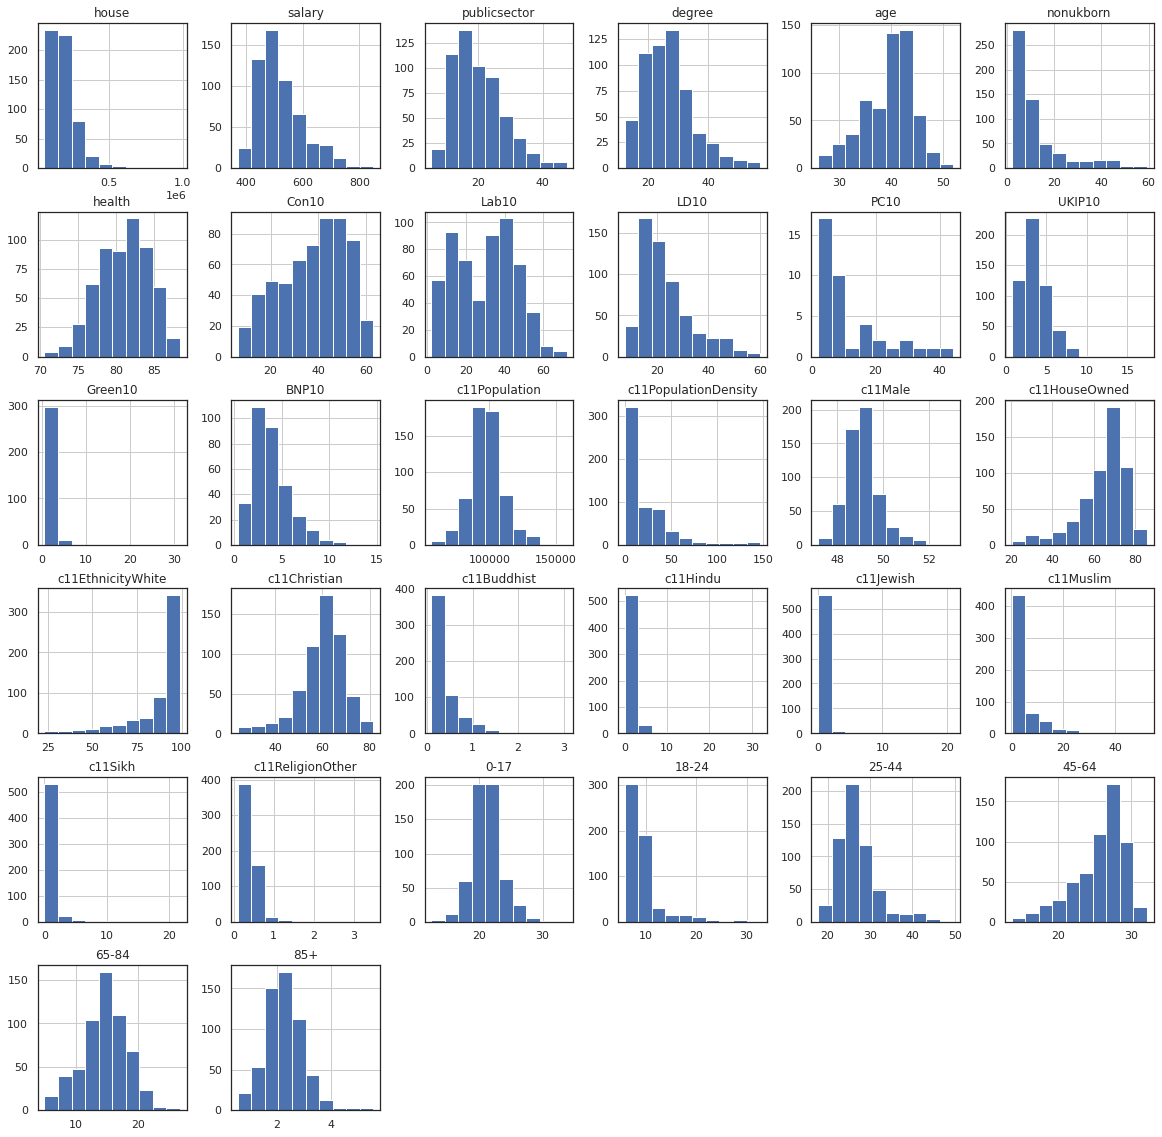

In [196]:
## Check the distribution of the attributes
df.hist(figsize=(20,20))
plt.show()

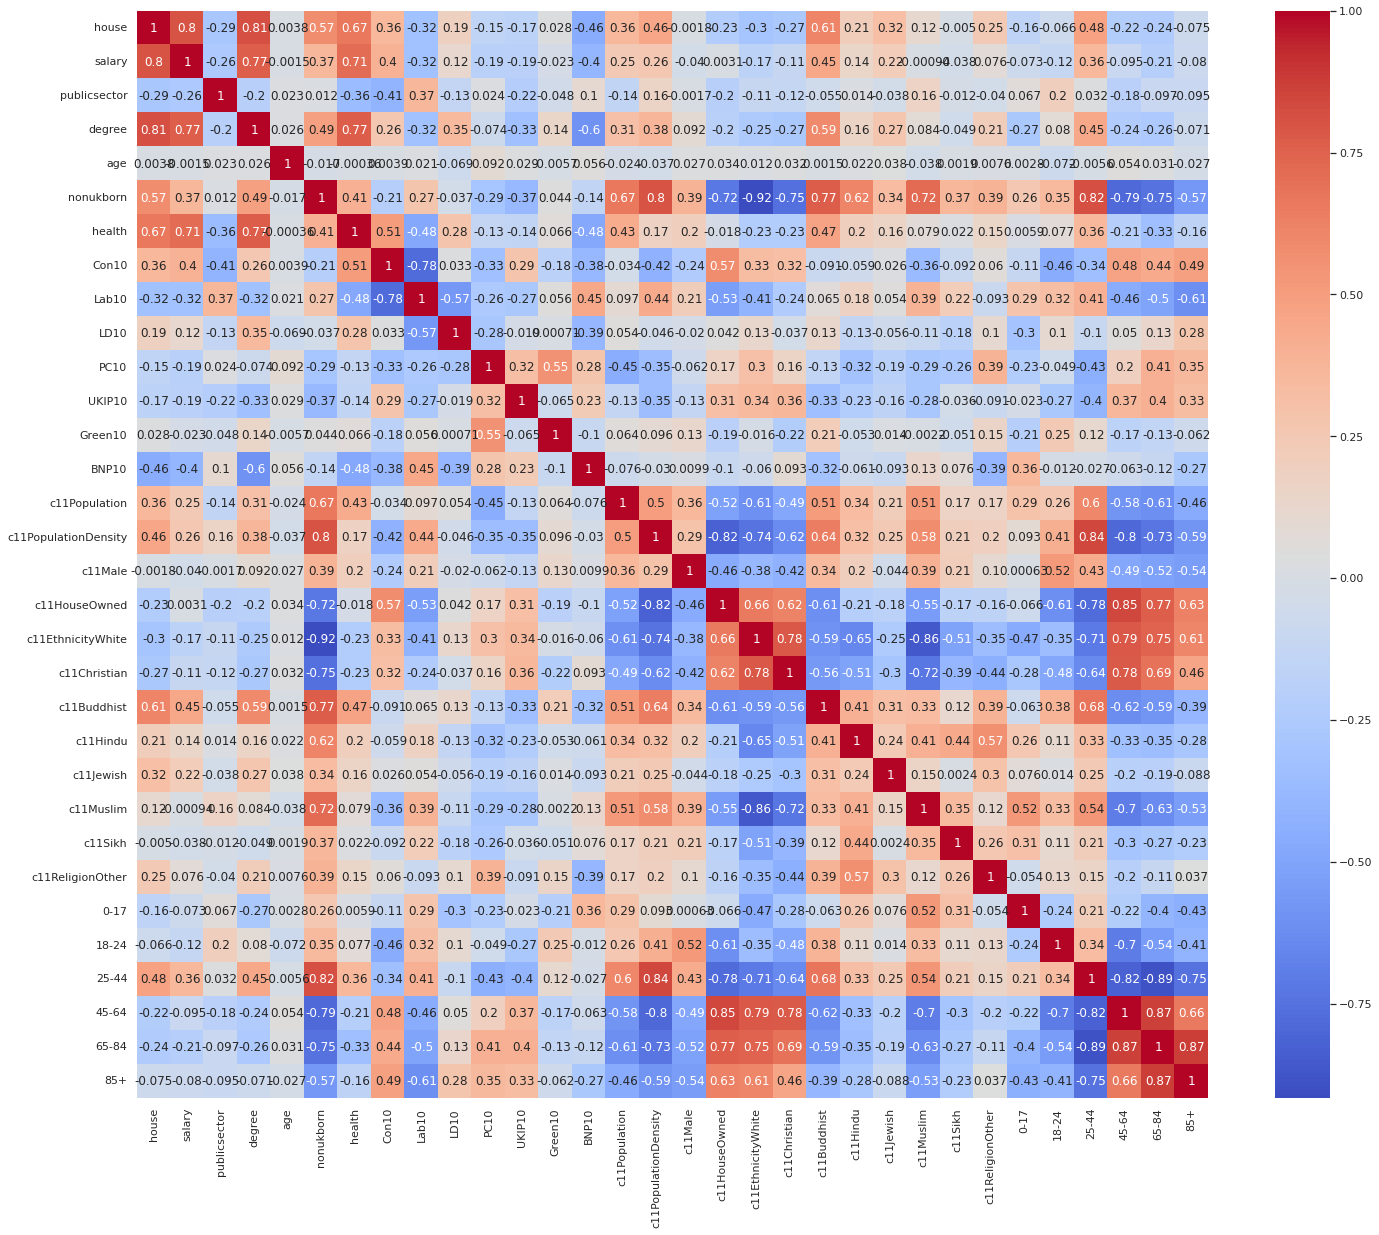

In [197]:
## check correlation of features

plt.figure(figsize=(24,20)) 
sns.heatmap(df.corr(), annot=True,cmap ='coolwarm')
plt.show()

### Visualising the data

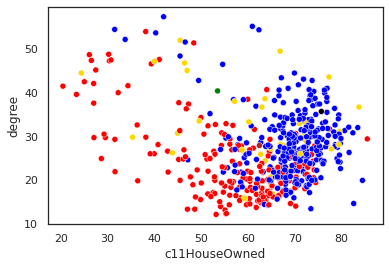

In [198]:
## scatterplot of home-ownership against % of constituents with a degree
sns.scatterplot(data=df, x="c11HouseOwned", y="degree",hue = 'Winner10',
                palette=['red','blue','brown','gold','green','black'],legend = False)

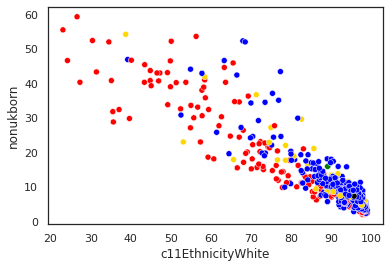

In [199]:
## scatterplot of % of constituents non-uk born against % of constituents that are white
sns.scatterplot(data=df, x="c11EthnicityWhite", y='nonukborn',hue = 'Winner10',
                palette=['red','blue','brown','gold','green','black'], legend = False)

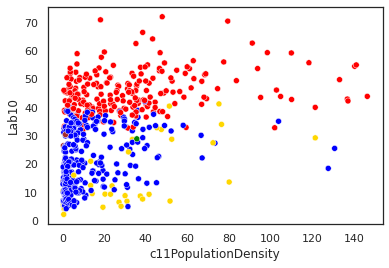

In [200]:
## scatterplot of population density against % of constituents that voted Labour
sns.scatterplot(data=df, x="c11PopulationDensity", y="Lab10",hue = 'Winner10',
                palette=['red','blue','brown','gold','green','black'],legend = False)

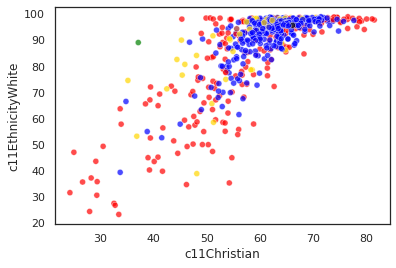

In [201]:
## scatterplot of % of constituents that are Christian against % of constituents that are white
sns.scatterplot(data=df, x='c11Christian', y="c11EthnicityWhite",hue = 'Winner10',
                palette=['red','blue','brown','gold','green','black'],legend = False,alpha = 0.7)

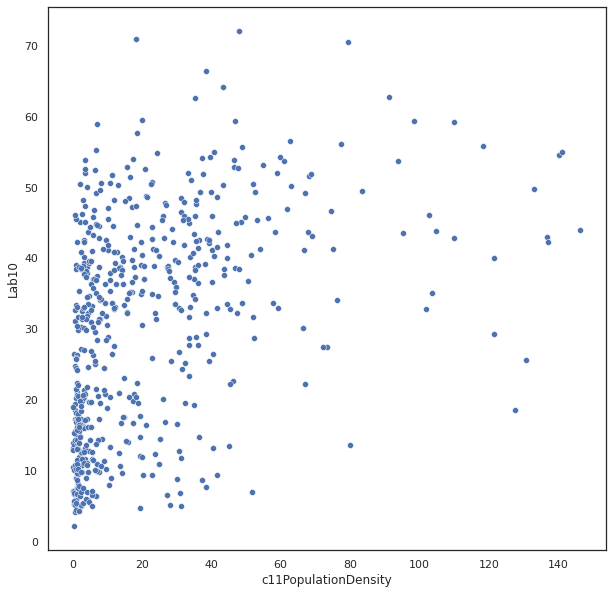

In [202]:
## scatterplot of population density against % of constituents that voted Labour - without colour coding for parties
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x="c11PopulationDensity", y="Lab10")

In [203]:
## Mean constituency for each party

df.groupby('Winner10').mean()

,house,salary,publicsector,degree,age,nonukborn,health,Con10,Lab10,LD10,PC10,UKIP10,Green10,BNP10,c11Population,c11PopulationDensity,c11Male,c11HouseOwned,c11EthnicityWhite,c11Christian,c11Buddhist,c11Hindu,c11Jewish,c11Muslim,c11Sikh,c11ReligionOther,0-17,18-24,25-44,45-64,65-84,85+
Winner10,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Conservative,214145.891803,543.507541,17.663607,28.407541,39.563934,10.209180,82.289508,48.108918,21.031344,23.116820,9.091250,3.964880,1.568432,3.200789,97734.170492,11.814069,49.016148,69.395455,91.704742,62.143157,0.397999,1.062465,0.480100,2.102838,0.446191,0.436074,20.971518,8.064747,25.801112,26.953998,15.673643,2.534981
Green,250000.000000,564.800000,14.100000,40.400000,39.000000,15.900000,85.300000,23.680000,28.910000,13.810000,NaN,1.830000,31.330000,NaN,103593.000000,35.714704,50.181962,53.518734,89.075517,37.099997,1.151622,0.631317,0.694062,1.842789,0.127422,0.921877,17.167183,18.455880,33.269622,20.788084,8.744799,1.574431
Labour,154578.423963,488.008295,23.569585,23.751613,39.654378,15.398618,79.011521,24.631843,45.581889,19.553318,9.670385,3.226823,1.767879,4.743467,98469.313364,34.065928,49.308423,57.202366,80.504375,57.328956,0.429445,1.761149,0.378269,7.574596,1.187160,0.384086,21.969602,10.598633,28.857775,24.006037,12.716650,1.851303
Liberal Democrat,205161.086957,518.541304,19.352174,30.371739,37.543478,12.773913,81.758696,31.792391,14.382174,46.788913,11.423333,3.166905,2.281154,2.582273,97944.608696,25.166741,49.069808,63.448474,88.192871,57.458674,0.510743,1.073178,0.306298,4.171106,0.320042,0.511713,19.931387,10.783986,26.418050,25.278115,14.995537,2.592925
Plaid Cymru,135000.000000,469.666667,28.800000,26.266667,40.666667,4.300000,79.133333,20.536667,23.596667,12.810000,38.650000,2.896667,NaN,NaN,64306.666667,0.743053,49.142393,68.415971,97.174448,60.474015,0.306430,0.182796,0.045136,0.837673,0.034514,0.549676,19.628081,10.022554,21.865753,27.299750,18.339221,2.844640
Speaker,274995.000000,646.200000,9.100000,35.700000,47.000000,7.300000,86.000000,47.300000,NaN,NaN,NaN,17.400000,NaN,NaN,97184.000000,1.120997,49.426860,75.695714,95.691678,66.137430,0.325156,0.293258,0.219172,0.831413,0.122448,0.341620,22.281446,6.406404,22.923527,30.780787,15.328655,2.279182


In [204]:
## Create a new dataframe with safe seats (where the winning party has over 50% of the vote)
safeseats = df[(df['Con10']>50)|(df['Lab10']>50)|(df['LD10']>50)]

In [205]:
safeseats.groupby(by = 'Winner10').mean()

,house,salary,publicsector,degree,age,nonukborn,health,Con10,Lab10,LD10,PC10,UKIP10,Green10,BNP10,c11Population,c11PopulationDensity,c11Male,c11HouseOwned,c11EthnicityWhite,c11Christian,c11Buddhist,c11Hindu,c11Jewish,c11Muslim,c11Sikh,c11ReligionOther,0-17,18-24,25-44,45-64,65-84,85+
Winner10,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Conservative,252409.833333,574.243651,15.357937,30.420635,39.547619,9.88254,83.360317,54.252381,14.536587,23.822381,NaN,4.368583,1.585625,3.034340,97796.555556,9.839217,48.908237,71.226926,93.087087,64.275125,0.379971,0.826504,0.420301,1.431701,0.329475,0.393661,21.004145,7.367420,25.129568,27.600579,16.240781,2.657507
Labour,156077.363636,480.758182,24.345455,22.847273,39.236364,20.02000,78.281818,17.476545,55.290545,17.866182,10.983333,2.904318,2.136154,4.902667,102448.527273,44.438411,49.235269,52.004890,73.631280,56.586448,0.495021,2.470265,0.595464,9.790681,1.591359,0.375602,22.800619,10.637988,30.000027,23.265351,11.697238,1.598778
Liberal Democrat,226650.000000,533.090000,19.390000,33.410000,38.400000,8.69000,82.500000,31.676000,6.690000,54.007000,28.270000,2.856000,1.601667,1.440000,91767.100000,11.256971,48.953922,69.613126,94.992128,59.675378,0.442811,0.479058,0.184928,0.944644,0.182158,0.530314,18.961551,10.165004,23.746455,26.827209,17.285255,3.014526


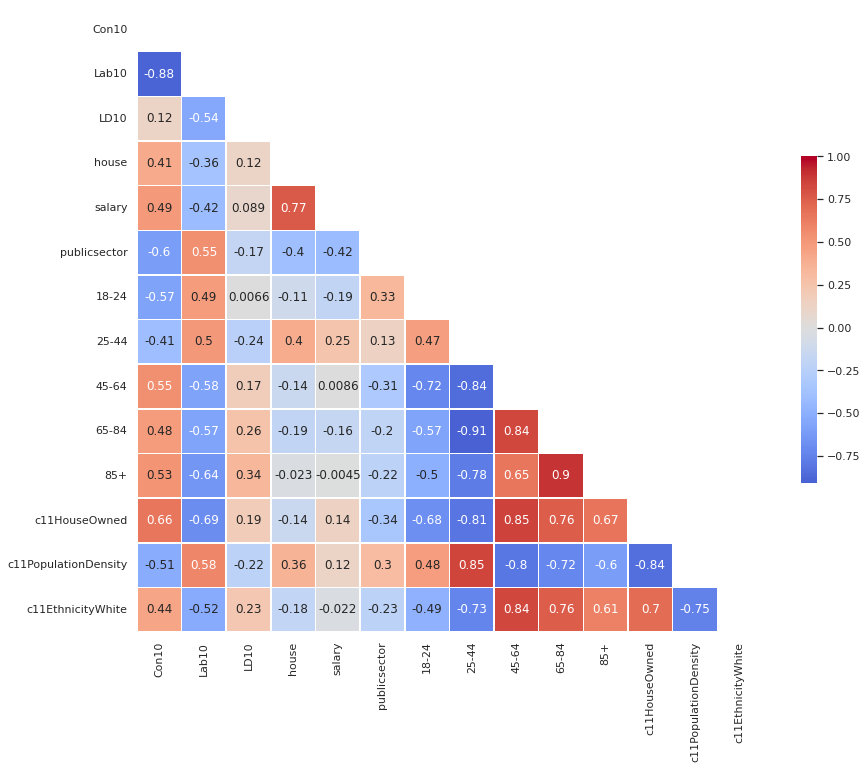

In [206]:
## Look at correlations in the safe seats dataframe

corr = safeseats[['Con10','Lab10','LD10','house','salary','publicsector','18-24','25-44','45-64','65-84',
                       '85+','c11HouseOwned','c11PopulationDensity','c11EthnicityWhite']].corr()
plt.figure(figsize=(14,12)) 
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True,cmap ='coolwarm',mask=mask,
            center=0,vmax=1,square=True,linewidth=0.5,cbar_kws={"shrink":0.5})
plt.show()

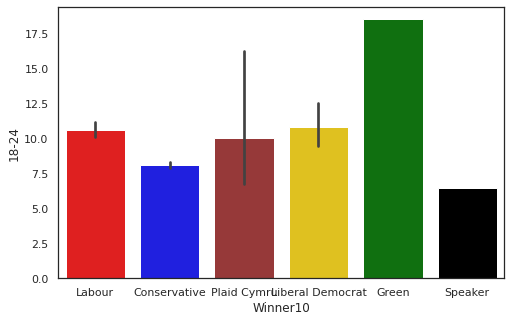

In [207]:
## Plot to show average % of constituents that are 18-24 for each party
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Winner10',y = '18-24', palette=['red','blue','brown','gold','green','black'])

In [208]:
### Ridgeline Plot of population density

In [209]:
dftry = df[df['Winner10'].isin(['Conservative', 'Labour','Liberal Democrat'])==True].copy()

In [210]:
dct = {1:'Labour',
        2: 'Conservative',
        3: 'Liberal Democrat'}

In [211]:
mean_serie = dftry.groupby('Winner10')['c11PopulationDensity'].mean()
dftry['mean'] = dftry['Winner10'].map(mean_serie)

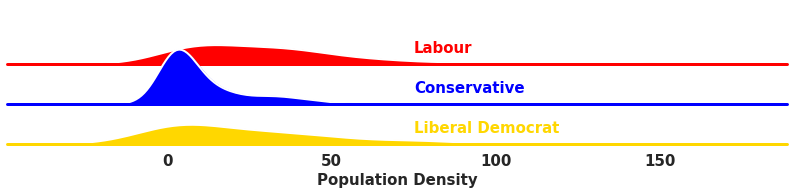

In [212]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette=['blue','gold','red'])

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(dftry, row='Winner10', hue='mean',  height=1, aspect=12, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'c11PopulationDensity',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'c11PopulationDensity', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=3, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the party as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(75,0.01, dct[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# # eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[],ylabel='')
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Population Density', fontweight='bold', fontsize=15)
# g.fig.suptitle('',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

plt.show()

In [213]:
##Ridgeline plot of Conservative voters by region

In [214]:
df['Region'].value_counts()

South East                  84
North West                  75
London                      73
West Midlands               59
East of England             58
South West                  55
Yorkshire and The Humber    54
East Midlands               46
Wales                       40
North East                  29
Name: Region, dtype: int64

In [215]:
dftry = df.copy()

In [216]:
mean_serie = dftry.groupby('Region')['Con10'].mean()
dftry['mean_con'] = dftry['Region'].map(mean_serie)

In [217]:
dftry = dftry.sort_values(by = 'mean_con')

In [218]:
dftry['Region'].unique()

array(['North East', 'Wales', 'North West', 'Yorkshire and The Humber',
       'London', 'West Midlands', 'East Midlands', 'South West',
       'East of England', 'South East'], dtype=object)

In [219]:
dct = {1:'North East',
       2:'Wales',
       3:'North West',
       4:'Yorkshire and The Humber',
       5:'London',
        6:'West Midlands',                  
        7:'East Midlands',    
        8:'South West',              
        9:'East of England',                       
        10:'South East'}

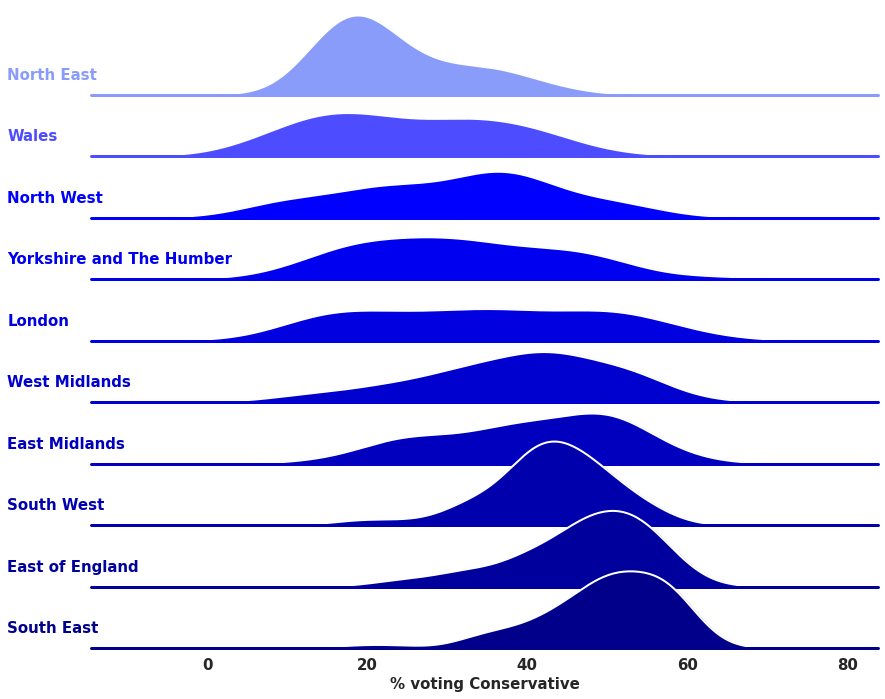

In [220]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
col = ['#899cfa', '#4D4DFF', '#0000FF', '#0000F1', '#0000E0', '#0000CF', '#0000BE', '#0000AD', '#00009C', '#00008B']
pal = sns.set_palette(col)

g = sns.FacetGrid(dftry, row='Region', hue='mean_con',  height=1, aspect=12,palette =pal)

# then we add the densities kdeplots for each party
g.map(sns.kdeplot, 'Con10',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Con10', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=3, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the party as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-25,0.01, dct[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# # eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[],ylabel='')
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('% voting Conservative', fontweight='bold', fontsize=15)
# g.fig.suptitle('',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

plt.show()

In [221]:
## Ridgeline plot of income by region

In [222]:
mean_serie = dftry.groupby('Region')['salary'].mean()
dftry['meansal'] = dftry['Region'].map(mean_serie)

In [223]:
dftry = dftry.sort_values(by = 'mean_con')

In [224]:
dftry['Region'].unique()

array(['North East', 'Wales', 'North West', 'Yorkshire and The Humber',
       'London', 'West Midlands', 'East Midlands', 'South West',
       'East of England', 'South East'], dtype=object)

In [225]:
dct = {1:'North East',
       2:'Wales',
       3:'North West',
       4:'Yorkshire and The Humber',
       5:'London',
        6:'West Midlands',                  
        7:'East Midlands',    
        8:'South West',              
        9:'East of England',                       
        10:'South East'}

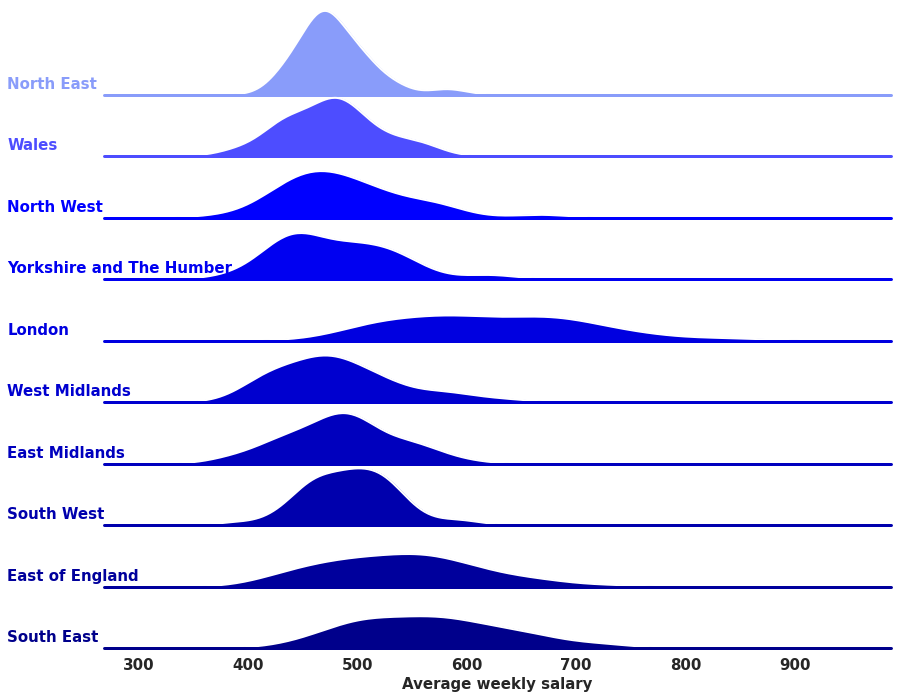

In [226]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
col = ['#899cfa', '#4D4DFF', '#0000FF', '#0000F1', '#0000E0', '#0000CF', '#0000BE', '#0000AD', '#00009C', '#00008B']
pal = sns.set_palette(col)
g = sns.FacetGrid(dftry, row='Region', hue='mean_con',  height=1, aspect=12, palette=pal)

# then we add the densities kdeplots for each party
g.map(sns.kdeplot, 'salary',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'salary', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=3, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the party as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(180,0.001, dct[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# # eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[],ylabel='')
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Average weekly salary', fontweight='bold', fontsize=15)
# g.fig.suptitle('',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

plt.show()

In [227]:
## Ridgeline plot of Labour voters by region

In [228]:
mean_serie = dftry.groupby('Region')['Lab10'].mean()
dftry['mean_lab'] = dftry['Region'].map(mean_serie)

In [229]:
dftry = dftry.sort_values(by = 'mean_lab')

In [230]:
dftry['Region'].unique()

array(['South West', 'South East', 'East of England', 'East Midlands',
       'West Midlands', 'Yorkshire and The Humber', 'Wales', 'London',
       'North West', 'North East'], dtype=object)

In [231]:
dct = {10:'North East',
        9:'North West',
        8:'London',
        7:'Wales',
        6:'Yorkshire and The Humber',
        5:'West Midlands',                  
        4:'East Midlands',    
        3:'East of England',              
        2:'South East',                       
        1:'South West'}

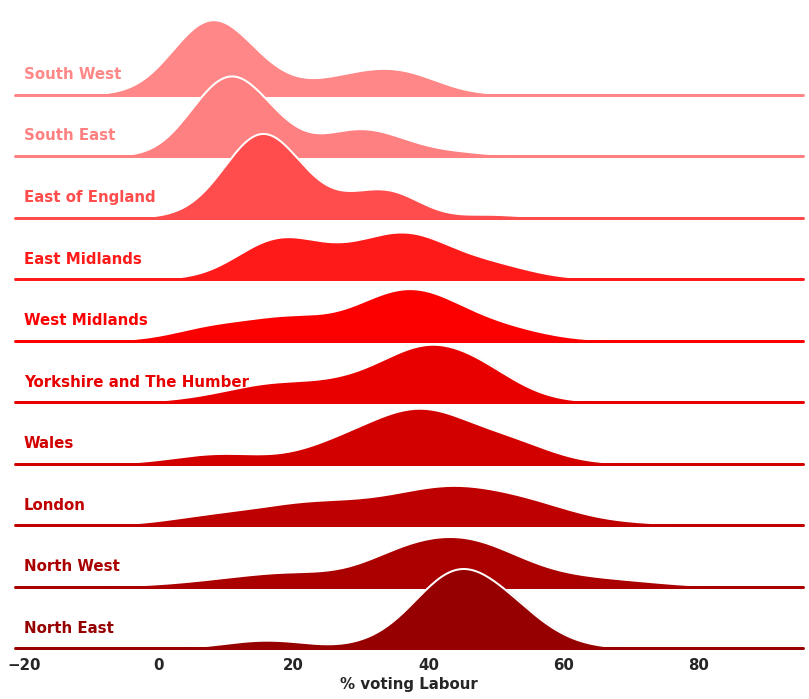

In [232]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
col =['#FF8787', '#FF8080', '#FF4D4D', '#FF1A1A', '#FC0000', '#E80000', '#D30000', '#BF0000', '#AA0000', '#960000']
pal = sns.set_palette(col)
g = sns.FacetGrid(dftry, row='Region', hue='mean_lab',  height=1, aspect=12, palette=col)

# then we add the densities kdeplots for each party
g.map(sns.kdeplot, 'Lab10',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Lab10', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=3, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the party as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-20,0.01, dct[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# # eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[],ylabel='')
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('% voting Labour', fontweight='bold', fontsize=15)
# g.fig.suptitle('',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

plt.show()

In [233]:
## Ridgeline plot of Lib Dem voters by region

In [234]:
mean_serie = dftry.groupby('Region')['LD10'].mean()
dftry['mean_ld'] = dftry['Region'].map(mean_serie)

In [235]:
dftry = dftry.sort_values(by = 'mean_ld')

In [236]:
dftry['Region'].unique()

array(['Wales', 'West Midlands', 'East Midlands', 'North West', 'London',
       'Yorkshire and The Humber', 'North East', 'East of England',
       'South East', 'South West'], dtype=object)

In [237]:
dct = { 7:'North East',
        4:'North West',
        5:'London',
        1:'Wales',
        6:'Yorkshire and The Humber',
        2:'West Midlands',                  
        3:'East Midlands',    
        8:'East of England',              
        9:'South East',                       
        10:'South West'}

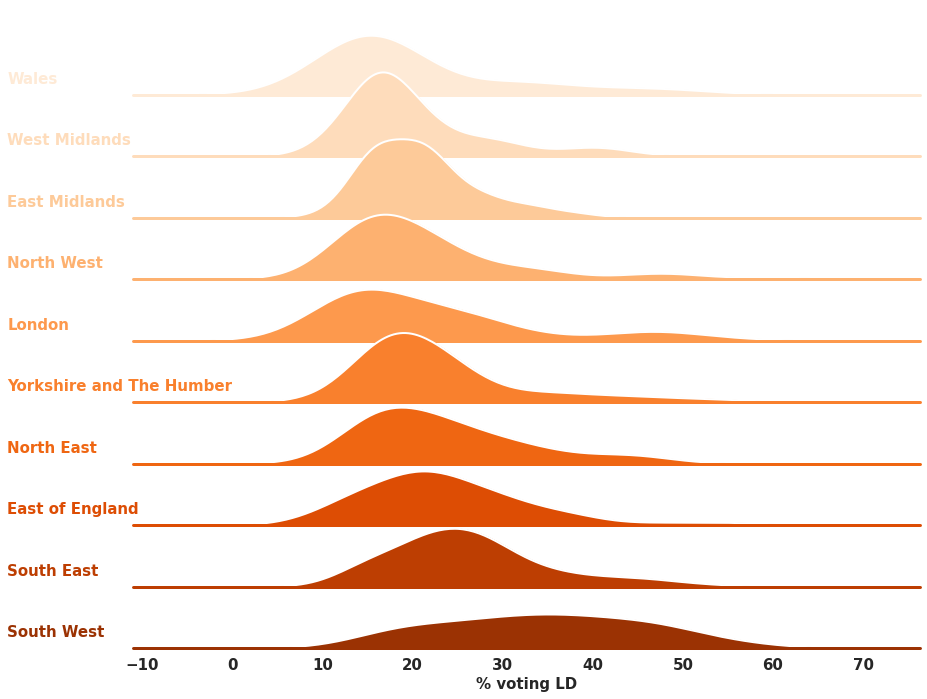

In [238]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(dftry, row='Region', hue='mean_ld',  height=1, aspect=12, palette='Oranges')

# then we add the densities kdeplots for each party
g.map(sns.kdeplot, 'LD10',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'LD10', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=3, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the party as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-25,0.01, dct[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# # eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[],ylabel='')
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('% voting LD', fontweight='bold', fontsize=15)
# g.fig.suptitle('',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

plt.show()

Age plots

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


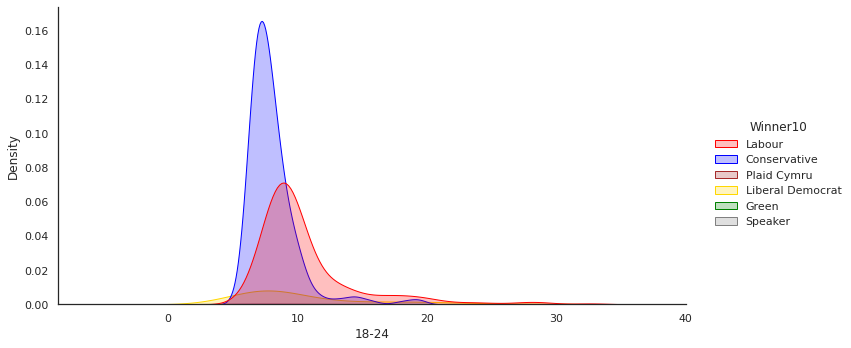

In [239]:
sns.displot(df, x="18-24", hue="Winner10", kind="kde",fill = True,height =5,aspect = 2, palette = ['red','blue','brown','gold','green','grey'])

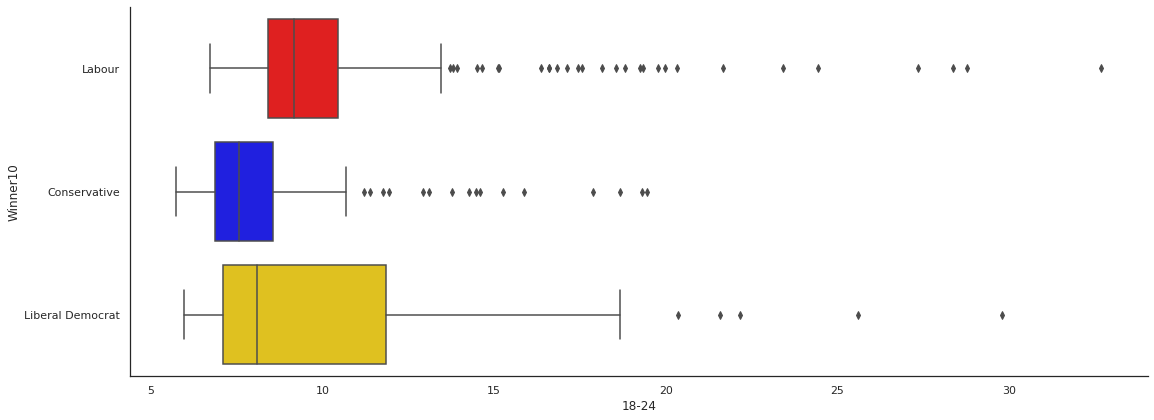

In [240]:
sns.catplot(data=df[df['Winner10'].isin(['Conservative', 'Labour','Liberal Democrat'])==True], y="Winner10"
           , x="18-24"
            ,height = 6,aspect=2.7
            ,palette = ['red','blue','gold'],kind = 'box')

In [241]:
dfnew = df.copy()
dfnew['65+'] = dfnew['65-84'] + dfnew['85+']

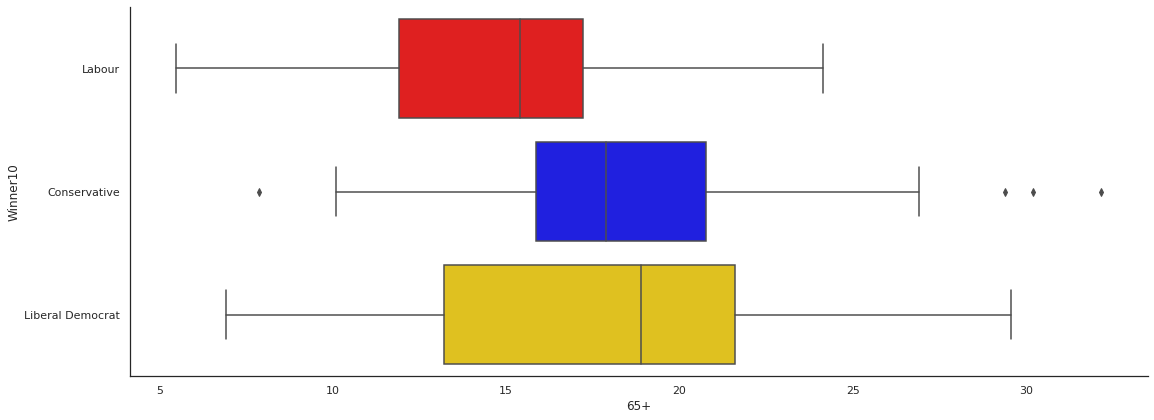

In [242]:
sns.catplot(data=dfnew[dfnew['Winner10'].isin(['Conservative', 'Labour','Liberal Democrat'])==True], y="Winner10"
           , x='65+'
            ,height = 6,aspect=2.7
            ,palette = ['red','blue','gold'],kind = 'box')

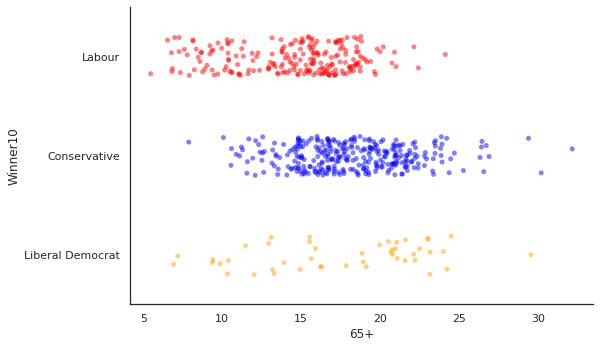

In [243]:
sns.catplot(data=dfnew[dfnew['Winner10'].isin(['Conservative', 'Labour','Liberal Democrat'])==True], y="Winner10"
           , x='65+'
            ,height = 5,aspect=1.7
            ,palette = ['red','blue','orange'],kind = 'strip',jitter = 0.2,alpha = 0.5)

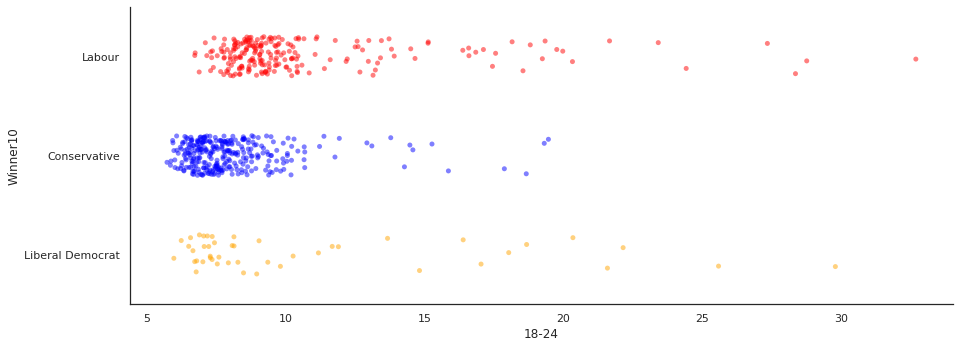

In [244]:
sns.catplot(data=dfnew[dfnew['Winner10'].isin(['Conservative', 'Labour','Liberal Democrat'])==True], y="Winner10"
           , x='18-24'
            ,height = 5,aspect=2.7
            ,palette = ['red','blue','orange'],kind = 'strip',jitter = 0.2,alpha = 0.5)


Home-ownership plot

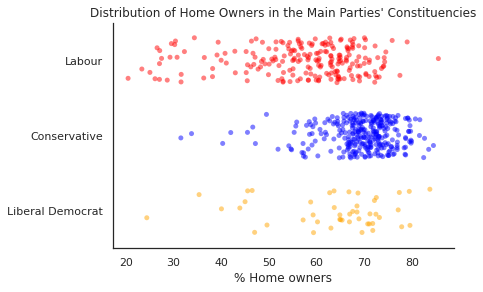

In [245]:
homes = sns.catplot(data=df[df['Winner10'].isin(['Conservative', 'Labour','Liberal Democrat'])==True], y="Winner10"
            ,x='c11HouseOwned'
            ,height = 4,aspect=1.7
            ,palette = ['red','blue','orange'],kind = 'strip', jitter = 0.3, alpha = 0.5)

# add label to the axis and label to the plot
homes.set(xlabel ="% Home owners", ylabel = "", title ='Distribution of Home Owners in the Main Parties\' Constituencies')
plt.show()